# Topographic Wetness Index (TWI) with Monte Carlo Simulation

## 💧 What is the Topographic Wetness Index (TWI)?

The **Topographic Wetness Index (TWI)** is a widely used indicator of potential soil moisture and saturation zones. It combines **local slope** and **upstream contributing area** to estimate how water accumulates in the landscape.  
It is particularly useful in environmental modeling, land use planning, and watershed analysis.

The TWI is calculated using the following formula:  
  
  $$WI = \ln\left(\frac{\text{Upstream}}{\text{Slope}}\right)$$

Higher TWI values indicate areas more likely to retain water, such as valleys or flat terrain, while lower values suggest well-drained areas like ridges.

## 🎲 Why Use Monte Carlo Simulation with TWI?

**Monte Carlo Simulation** is a computational technique that uses random sampling to model uncertainty and variability in complex systems. When applied to TWI analysis, it offers several advantages:

- **Uncertainty Quantification**: Accounts for errors in input data such as DEMs (Digital Elevation Models)
- **Probabilistic Modeling**: Produces a range of possible outcomes rather than a single deterministic result
- **Robust Decision Support**: Enhances reliability in hydrological and environmental assessments

## 🛠️ Applications

- Identifying **zones of soil saturation** and **runoff generation**  
- Modelling **erosion risk** and **landslide susceptibility**  
- Supporting **agricultural planning** and **drainage design**  
- Forecasting **flood-prone areas** and **wetland dynamics**  
- Enhancing **watershed management** and **climate adaptation strategies**


## 🔄 Dynamic Modelling of Topographic Wetness Index (TWI) with Monte Carlo Simulation Using PCRaster

**PCRaster** is a powerful environmental modelling framework designed for **spatial and temporal analysis** of hydrological processes.  
It enables simulation of water flow, soil moisture, and catchment dynamics using **raster-based GIS data**, and supports **dynamic modelling** through Python scripting.
In PCRaster, TWI can be dynamically modelled and statistically analysed using **Monte Carlo simulation**.

## 🔍 PCRaster Key Features
- 🗺️ **Raster-based spatial modelling**  
- 🐍 **Python integration** for flexible scripting  
- ⏱️ **Time-step simulations** for dynamic processes  
- 🌧️ **Hydrological modules** for runoff, infiltration, and drainage  
- 📊 **Built-in statistical tools** for uncertainty and sensitivity analysis  

## 🧠 Key Concepts
To run a dynamic hydrological model repeatedly (e.g., 1000 times), each time with randomised or varied inputs, and compute TWI and related outputs for statistical analysis.

- **Stochastic Inputs**: Randomized variables (e.g., rainfall, soil properties) generated using PCRaster’s `uniform()`, `normal()`, or other distribution functions.
- **Dynamic Loop**: A time-stepped model that evolves spatially.
- **Monte Carlo Loop**: An outer loop that runs the dynamic model multiple times.
- **Output Aggregation**: Collect results across runs to compute mean, variance, percentiles, etc., for TWI and other metrics.


## 📚 Publications
- Karssenberg, D., Schmitz, O., Salamon, P., & Bierkens, M. F. P. (2010). *PCR-GLOBWB: A global hydrological model based on PCRaster*. Hydrology and Earth System Sciences, 14(12), 2127–2141. https://doi.org/10.5194/hess-14-2127-2010  
- Schmitz, O., Karssenberg, D., & van Deursen, W. (2009). *A dynamic hydrological model using PCRaster for spatially distributed simulation of water balance*. Environmental Modelling & Software, 24(3), 300–312. https://doi.org/10.1016/j.envsoft.2008.09.005  
- van Deursen, W. P. A. (1995). *Geographical information systems and dynamic models* [PhD thesis, Utrecht University]. https://www.researchgate.net/publication/243772037_Geographic_Information_Systems_and_Dynamic_Models



## 👤 Author: Julian Manning

## 📄 License & Usage

This work is licensed under the Creative Commons Attribution 4.0 International License.  
Feel free to use, adapt, and share with attribution.

📅 Created on: **15 August 2025**  

📧 [julian.manning@outlook.com](mailto:julian.manning@outlook.com)

🔗 Connect on [LinkedIn](https://www.linkedin.com/in/julian-manning/)



   <p style="text-align:left">
    <a href="https://www.hydsens.com/teaching" target="_blank">
        <img src="https://static.wixstatic.com/media/51f9f4_e9a4428cbf1c45fc8b9ac792584ab615~mv2.gif" width="600" alt="Graphic">
    </a>
</p>

# ⚙️ 1. Environment Setup

## 🛠️ 1.1 Installing PCRaster

To run the code discussed in this context, you’ll need to install the **PCRaster** Python module  a specialised library for environmental modeling and spatial analysis.



<p style="text-align:left">
    <a href="https://github.com/pcraster/pcraster" target="_blank">
    <img src="https://plugins.qgis.org/media/cache/f5/23/f52384bc7b35cf08218c9099f6013b1d.png" width="50" alt="Graphic">
    </a>
</p>


💡 It's best to set up a dedicated **Conda environment** to isolate dependencies and avoid conflicts with other Python packages.  
Once the environment is set up, simply activate it to run PCRaster scripts—no need to reinstall anything each time.
I have tested this project using **Python 3.10.16**. 

### 📦 Installation Instructions

The following code should be entered directly into your **Conda prompt** (not a Python script). 

- 🖥️ **Command-line script syntax**  

This sets up the environment and installs PCRaster:

```bash
conda install -c conda-forge pcraster
# or
conda create --name pcraster -c conda-forge --override-channels -y pcraster
```


## 🛠️ 1.2 Environment Setup

To support raster data processing, spatial analysis, and visualisation, ensure the following Python libraries are installed in your environment.

### 📦 Required Libraries

- `os` – Provides a way of using operating system-dependent functionality like file and directory management.
- `logging` – Enables tracking and debugging by recording messages during code execution.  
- `numpy` – Fundamental package for numerical computations, used for handling raster arrays and replacing missing values.  
- `rasterio` – A powerful library for reading and writing geospatial raster data.  
- `gdal` – A robust library for reading, writing, and converting geospatial raster formats, including support for TIFF, ASCII Grid, and many others.  
- `pcraster` – A specialized library for environmental modeling and raster-based spatial analysis, particularly useful for hydrological and ecological simulations.  
- `pcraster.framework` – Provides a modeling framework for dynamic and Monte Carlo simulations in PCRaster.  
- `matplotlib` – A comprehensive library for creating static, animated, and interactive visualizations in Python.  

### 📥 Installation (Recommended via Conda)

To install all required libraries, especially GDAL with its dependencies, you may use the following:
- 🖥️ **Command-line script syntax**

```bash
conda install -c conda-forge gdal rasterio numpy matplotlib pcraster


In [1]:
import os  # Provides functions for interacting with the operating system (e.g., file paths, directories)
import logging  # Enables logging for debugging, tracking execution, and recording runtime events
import numpy as np  # Supports numerical operations and array manipulation, especially for large datasets
import rasterio  # Used for reading, writing, and processing geospatial raster data
from osgeo import gdal  # Offers tools for raster and vector geospatial data processing (part of GDAL library)
from pcraster import *  # Imports all PCRaster functions for environmental modeling and spatial analysis
from pcraster.framework import *  # Provides PCRaster's modeling framework for dynamic and Monte Carlo simulations
from pcraster.multicore import set_nr_worker_threads  # Allows setting the number of worker threads for parallel processing
import matplotlib.pyplot as plt  # Enables visualization of data, including raster plots and graphs
from matplotlib.colors import LightSource  # Used to create hillshade effects for terrain visualization
import builtins  # Provides access to built-in functions like max(), min(), etc.
import time  # Used for tracking execution time or introducing delays
import pycrs  # Parses and handles coordinate reference systems (CRS) in various formats
import glob  # Finds all pathnames matching a specified pattern (e.g., for batch file processing)
import subprocess  # Allows running external commands and processes from within Python

## ⚙️ 1.3 PCRaster Thread Optimiser

The **PCRaster Thread Optimiser** is a Python-based utility that dynamically configures the number of worker threads used by PCRaster based on the system's available CPU resources.  
It applies a **resource-aware rule of thumb**, leaving a portion of threads free to ensure smooth operation of other processes and avoid system overload during intensive geospatial modeling tasks.

This function is ideal for users running **PCRaster simulations** on multi-core machines and seeking a balance between performance and system stability.

### [Thread Management Features]  
- 🧠 **Smart Allocation**: Automatically calculates optimal thread count using a safety margin  
- 🖥️ **System-Aware**: Detects total logical CPU cores available on the machine  
- 🛡️ **Safe Defaults**: Leaves 30% of threads free by default to protect system responsiveness  
- 🔁 **Reusable Configuration**: Can be called before any PCRaster simulation to ensure optimal setup  
- 📣 **Clear Feedback**: Prints and returns the number of threads being used  

---

### 🛠️ Function Parameters
| Parameter         | Type   | Description                                                                 |
|-------------------|--------|-----------------------------------------------------------------------------|
| `safety_margin`   | `float`| Fraction of threads to leave unused (default is `0.30` for 30% safety)      |

---

### 📤 Output

- 🔢 **Thread Count**: Number of threads set for PCRaster via the `PCRASTER_NR_WORKER_THREADS` environment variable  
- 📣 **Console Message**: Prints the total and allocated thread count for transparency  
- 🔁 **Returned Value**: Returns the number of threads allocated for use in downstream logic  

---

### 🧪 Example Usage

```python
# Call the function to set PCRaster threads.
_ = set_pcraster_threads(safety_margin=0.30)

In [2]:
def set_pcraster_threads(safety_margin=0.30):
    if not (0 <= safety_margin < 1):
        raise ValueError("safety_margin must be between 0 and 1 (non-inclusive of 1).")

    total_threads = os.cpu_count()
    if total_threads is None:
        raise RuntimeError("Unable to detect CPU thread count.")

    threads_to_use = builtins.max(1, int(total_threads * (1 - safety_margin)))

    os.environ["PCRASTER_VERBOSE"] = "1"
    os.environ["PCRASTER_NR_WORKER_THREADS"] = str(threads_to_use)

    print(f"🧠 PCRaster configured to use {threads_to_use} of {total_threads} CPU threads ⚙️ (Safety margin: {int(safety_margin * 100)}%)")

    return threads_to_use


In [3]:
# Call the function to set PCRaster threads.
# The underscore (_) is used to suppress the returned value from being printed in interactive environments like Jupyter.
_ = set_pcraster_threads(safety_margin=0.30)

🧠 PCRaster configured to use 22 of 32 CPU threads ⚙️ (Safety margin: 30%)


# 🧰 2. Workspace Setup

## 📁 2.1 Make Workplace Folder

Set the working directory to the project folder so that all file operations (reading/writing maps, scripts, etc.) are relative to this path.


In [4]:
os.chdir("D:/NRM/RAS/PCRaster/Test")  # Read the folder path 

## 🌍 2.2 GeoTIFF to ASCII Raster Converter

The **GeoTIFF to ASCII Raster Converter** is a Python-based utility that transforms geospatial raster data from `.tif` (GeoTIFF) format to `.asc` (ASCII Grid) format.  
This conversion is crucial for compatibility with legacy GIS tools, hydrological and environmental modeling platforms like **PCRaster**, and other systems that require ASCII grid input.  
This conversion can also be accomplished using either **ArcGIS** or **QGIS**.

[Raster Conversion]  
- 📐 **Preserves Spatial Metadata**: Maintains coordinate reference system and cell resolution  
- ⚙️ **Workflow-Ready**: Easily integrates into automated geospatial processing pipelines  
- 🧾 **Robust Error Handling**: Logs detailed messages and raises exceptions on failure  
- 📁 **Auto-Creates Output Folder**: Ensures the destination folder exists before saving  
- 🔁 **Reusable Paths**: Returns input and output paths for use in downstream processing  

---

### 🛠️ Function Parameters

| Parameter         | Type   | Description                                                  |
|-------------------|--------|--------------------------------------------------------------|
| `input_tif_path`  | `str`  | Full path to the input `.tif` file                           |
| `output_asc_path` | `str`  | Full path where the output `.asc` file will be saved         |

---

### 📤 Output

- 📄 **ASCII Raster File**: Saved at the specified `output_asc_path`, ready for use in modeling tools  
- 📁 **Created Folder**: Automatically creates the output folder if it doesn't exist  
- 🔁 **Returned Paths**: Tuple containing both input and output paths for reuse  
- ✅ **Log Message**: Confirms success or provides detailed error information  

---

### 🧪 Example Usage

```python
input_path, output_path = convert_tif_to_ascii(
    input_tif_path="C:/path/to/dem_file.tif",
    output_asc_path="C:/path/to/save/output.asc"
)

print(f"Input path: {input_path}")
print(f"Output path: {output_path}")


In [5]:
def convert_tif_to_ascii(input_tif_path, output_asc_path):
    """
    Converts a GeoTIFF file to ASCII Grid format using GDAL.

    Parameters:
    - input_tif_path (str): Path to the input .tif file.
    - output_asc_path (str): Path to the output .asc file.

    Returns:
    - tuple: (input_tif_path, output_asc_path)
    """
    # Configure logging
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
    gdal.UseExceptions()  # Enable GDAL exceptions

    # Ensure output directory exists
    output_dir = os.path.dirname(output_asc_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        logging.info(f"Created output directory: {output_dir}")

    # Open the input raster
    src_ds = gdal.Open(input_tif_path)
    if src_ds is None:
        logging.error(f"Unable to open input file: {input_tif_path}")
        raise FileNotFoundError(f"Unable to open input file: {input_tif_path}")

    # Convert to ASCII
    try:
        gdal.Translate(output_asc_path, src_ds, format='AAIGrid')
        logging.info("Conversion complete.")
    except Exception as e:
        logging.error(f"Conversion failed: {e}")
        raise RuntimeError(f"Conversion failed: {e}")

    # Return the paths for reuse
    return input_tif_path, output_asc_path


In [6]:
dem_input_path_TIFF, dem_output_path_ASCII = convert_tif_to_ascii(
    input_tif_path="D:/NRM/RAS/PCRaster/Test/DEM.tif",
    output_asc_path="D:/NRM/RAS/PCRaster/Test/DEM.asc"
)
# Now you can use these variables anywhere in your script
print(f"DEM TIFF Input: {dem_input_path_TIFF}")
print(f"DEM ASCII Output: {dem_output_path_ASCII}")


2025-08-20 10:04:44,914 - INFO - Conversion complete.


DEM TIFF Input: D:/NRM/RAS/PCRaster/Test/DEM.tif
DEM ASCII Output: D:/NRM/RAS/PCRaster/Test/DEM.asc


## 📄 2.3 Define Working Files
This section defines key working filenames derived from the output ASCII raster path. These names are used in subsequent steps for creating clone maps, PCRaster-compatible formats, and managing intermediate files.

In [7]:
# Extract the base file name (without extension) from the ASCII output path
file_name = os.path.splitext(os.path.basename(dem_output_path_ASCII))[0]

# Define the clone file name by appending "_clone"
clone_name = file_name + "_clone"

# Define the PCRaster map file name with .map extension
dem_pcraster = file_name + ".map"

## 📄 2.4 Read ASCII Raster Metadata

This section reads metadata from an ASCII raster (`.asc`) file using the `rasterio` and `pycrs` libraries. It extracts key spatial properties such as dimensions, resolution, bounding box coordinates, and the coordinate reference system (CRS), which are essential for geospatial analysis and model setup.

---

### 🧠 Operations Performed

- 📏 **Dimensions**: Retrieves the number of rows and columns in the raster  
- 📐 **Resolution**: Extracts the cell size (spatial resolution)  
- 🌍 **Extent**: Gets the bounding coordinates (left, right, top, bottom)  
- 🧭 **CRS**: Parses the coordinate reference system using `pycrs` and identifies the projection name if available

In [8]:
# Open the ASCII (*.asc) file
with rasterio.open(dem_output_path_ASCII) as src:
    # Get the number of rows and columns
    num_rows, num_cols = src.shape
    print(f'Number of rows: {num_rows}')
    print(f'Number of columns: {num_cols}')

    # Get the cell size
    cell_size = src.res
    print(f'Cell size: {cell_size}')

    # Get the extents
    left, bottom, right, top = src.bounds
    print('Extents:')
    print(f'Top: {top}')
    print(f'Left: {left}')
    print(f'Right: {right}')
    print(f'Bottom: {bottom}')

    # Get the CRS in WKT format and parse it using pycrs
    wkt_crs = src.crs.to_wkt()
    crs = pycrs.parse.from_ogc_wkt(wkt_crs)

    # Print the projection name if available
    try:
        projection_name = crs.name
        print(f'Projection Name: {projection_name}')
    except AttributeError:
        print('Projection name not found or CRS is not projected.')

    # Get and print the EPSG code using rasterio
    epsg_code = src.crs.to_epsg()
    if epsg_code:
        print(f'EPSG Code: {epsg_code}')
    else:
        print('EPSG code could not be determined.')


Number of rows: 1000
Number of columns: 1000
Cell size: (1.0, 1.0)
Extents:
Top: 5274000.0
Left: 544000.0
Right: 545000.0
Bottom: 5273000.0
Projection Name: GDA2020 / MGA zone 55
EPSG Code: 7855


## 🗺️ 2.5 Create a Clone Map with `mapattr`

This command uses the `mapattr` utility from PCRaster to create a **clone map**, which defines the spatial structure for raster operations. The clone map ensures that all subsequent maps align in terms of grid size, resolution, and geolocation.  
[Command Help Page](https://pcraster.geo.uu.nl/pcraster/4.4.1/documentation/pcraster_manual/sphinx/app_mapattr.html#index-0)

### Parameters Explained

| Parameter            | Description |
|----------------------|-------------|
| `-s`                 | Enables silent mode (suppresses output). |
| `-R {num_rows}`      | Specifies the number of rows in the map grid. Replace `{num_rows}` with an integer. |
| `-C {num_cols}`      | Specifies the number of columns in the map grid. Replace `{num_cols}` with an integer. |
| `-S`                 | Enables square cell mode (each cell is treated as a square). |
| `-P yt2b`            | Sets the projection type or profile. `yt2b` is likely a predefined projection or layout format. |
| `-x {left}`          | Sets the left (X) coordinate of the map origin. Replace `{left}` with a numeric value. |
| `-y {top}`           | Sets the top (Y) coordinate of the map origin. Replace `{top}` with a numeric value. |
| `-l 1`               | Sets the layer number to 1 (could be used for multi-layered maps). |
| `--small`            | Indicates that the map is a small clone or version. |
| `{clone_name}.map`   | The name of the map file being modified or created. Replace `{clone_name}` with your desired filename (without the `.map` extension). |

In [9]:
!mapattr -s -R {num_rows} -C {num_cols} -S -P yt2b -x {left} -y {top} -l 1 --small {clone_name}.map

mapattr version: 4.4.2 (win64/msvc)
ERROR: -s: can not change number of rows or columns of an existing map


## 🗺️ 2.6 Convert ASCII Raster to PCRaster Map with `asc2map`

This command uses the `asc2map` utility from PCRaster to convert an **ASCII raster file** (commonly `.asc`) into a **PCRaster map format** (`.map`).  
It ensures the new map aligns spatially with a predefined **clone map**, maintaining consistency in resolution, extent, and projection.  
[Command Help Page](https://pcraster.geo.uu.nl/pcraster/4.4.1/documentation/pcraster_manual/sphinx/app_asc2map.html#index-0)


### Parameters Explained

| Parameter                  | Description |
|----------------------------|-------------|
| `-a`                       | Automatically assigns attribute values based on the input ASCII file. |
| `--clone {clone_name}.map` | Specifies the clone map to use for spatial reference. Replace `{clone_name}` with the name of your existing `.map` file. |
| `{asc_file}`               | The input ASCII raster file to be converted. Replace `{asc_file}` with the filename of your `.asc` file. |
| `{file_name}.map`          | The output PCRaster map file. Replace `{file_name}` with your desired output name (without the `.map` extension). |



In [10]:
!asc2map -a --clone {clone_name}.map {dem_output_path_ASCII} {file_name}.map

asc2map version: 4.4.2 (win64/msvc)
number lines read: 1006 
number of non-mv cells: 1000000
number of mv cells: 0


# 🔄 3. Dynamic Modelling of TWI with Monte Carlo Simulation

Monte Carlo simulation is a powerful technique for exploring **uncertainty and variability** in environmental models. 
In PCRaster, it enables repeated execution of a dynamic model with **stochastic inputs**, allowing us to assess how uncertain parameters influence spatial and temporal outcomes.

## 💧 Wetness Index Simulation Model

The **Wetness Index Simulation Model** is a dynamic hydrological modeling tool built using **PCRaster**. It simulates terrain wetness dynamically by perturbing a Digital Elevation Model (DEM), calculating slopes, generating flow directions, and computing upstream areas.  
This model is particularly useful for **uncertainty analysis**, **terrain sensitivity studies**, and **hydrological risk assessments**.

### 🔍 Hydrological Simulation Highlights

- 🌐 **Spatially Explicit**: Operates on raster maps with defined spatial extent and resolution  
- 🔁 **Dynamic Timesteps**: Runs over multiple timesteps to simulate temporal variability  
- 🧮 **Monte Carlo Perturbation**: Adds random noise to DEM to assess uncertainty  
- 📈 **Wetness Index Calculation**: Uses upstream area and slope to compute terrain wetness  
- 🧾 **Error Logging**: Captures and logs errors for diagnostics  
- 📊 **Running Averages**: Tracks and reports average maps over time  
- 🛡️ **Robust Error Handling**: Flags and logs issues per timestep to ensure traceability  

---

### 🛠️ Model Parameters

| Parameter         | Type   | Description                                                                 |
|-------------------|--------|-----------------------------------------------------------------------------|
| `cloneMap`        | `str`  | Path to the clone map defining spatial extent and resolution                |
| `dem`             | `str`  | Path to the DEM raster map used for terrain analysis                        |
| `error_magnitude` | `float`| Magnitude of random perturbation applied to the DEM                         |
| `firstTimestep`   | `int`  | Starting timestep for the dynamic simulation                                |
| `lastTimeStep`    | `int`  | Final timestep for the dynamic simulation                                   |

---

### ⚙️ Key Methods

#### `initial(self)`
- Loads the static DEM map  
- Validates DEM integrity  
- Initializes boolean mask and accumulation maps for averaging  

#### `dynamic(self)`
- Prints current timestep progress  
- Perturbs DEM with Gaussian noise  
- Calculates slope and repairs flow direction (LDD)  
- Computes upstream area and Wetness Index  
- Saves simulation and average maps for each timestep  
- Logs errors and flags problematic timesteps  

#### `log_error(self, context, error)`
- Logs error messages to `error_log.txt`  
- Prints error context and message to console  

---

### 📤 Output

- 🗺️ **Simulated DEM Maps**: `DEMSimu_<timestep>.map`  
- 🗺️ **Wetness Index Maps**: `WIsimu_<timestep>.map`  
- 📊 **Average Maps**: `DEMavg_<timestep>.map`, `WIavg_<timestep>.map`  
- 🧾 **Error Logs**: `error_log.txt`, `ErrorFlag_<timestep>.map`  
- ⏱️ **Progress Info**: Printed to console per timestep  

---

### 🧪 Example Usage

```python
# Set DEM input
dem = "dem_pcraster.map"  # Replace with actual DEM map filename

# Initialize and run model
myModel = WetnessIndex(clone_name + ".map", error_magnitude=0.10)
dynModelFw = DynamicFramework(myModel, lastTimeStep=10, firstTimestep=1)
dynModelFw.run()


In [11]:
class WetnessIndex(DynamicModel):
    def __init__(self, cloneMap, error_magnitude=0.10):
        DynamicModel.__init__(self)
        setclone(cloneMap)  # Set the spatial extent and resolution
        self.err = error_magnitude  # Error magnitude as a parameter

    def initial(self):
        try:
            # Load static DEM
            self.DEM = readmap(dem)
            if self.DEM is None:
                raise ValueError("DEM could not be loaded or is invalid.")

            self.BOOL = boolean(1)

            # Initialize sum maps
            self.DEMsum = scalar(0)
            self.Slopesum = scalar(0)
            self.Upsum = scalar(0)
            self.WIsum = scalar(0)

        except Exception as e:
            self.log_error("Initialization", e)
            raise  # Stop execution if initialization fails

    def dynamic(self):
        try:
            # 👇 Print current timestep out of total
            print(f" ⌛ Running timestep {self.currentTimeStep()} of {self.nrTimeSteps()}")

            # Perturb DEM
            DEMsimu = self.DEM + self.err * normal(self.BOOL)

            # Calculate slope
            SlopeTmp = slope(DEMsimu)
            Slope = ifthenelse(SlopeTmp == 0, 0.001, SlopeTmp)

            # Create and repair LDD
            LDDtmp = lddcreate(DEMsimu, 1e31, 1e31, 1e31, 1e31)
            LDD = lddrepair(LDDtmp)

            # Calculate upstream area
            Upstream = catchmenttotal(cellarea(), LDD)

            # Compute Wetness Index
            WIsimu = ln(Upstream / Slope)

            # Save maps for each timestep
            #report(DEMsimu, f"DEMSimu_{self.currentTimeStep()}.map")
            #report(WIsimu, f"WIsimu_{self.currentTimeStep()}.map")
            #report(Slope, f"Slope_{self.currentTimeStep()}.map")
            #report(Upstream, f"Upstream_{self.currentTimeStep()}.map")


            # Accumulate sums
            self.DEMsum += DEMsimu
            self.Slopesum += Slope
            self.Upsum += Upstream
            self.WIsum += WIsimu

            # Report running averages
            DEMavg = self.DEMsum / self.currentTimeStep()
            WIavg = self.WIsum / self.currentTimeStep()
            Slopeavg = self.Slopesum / self.currentTimeStep()
            Upavg = self.Upsum / self.currentTimeStep()
          
            report(Upstream, f"{file_name}_Up_Ave_{self.currentTimeStep()}.map")
            report(Slopeavg, f"{file_name}_Slope_Avg_{self.currentTimeStep()}.map")
            report(DEMavg, f"{file_name}_DEM_Avg_{self.currentTimeStep()}.map")
            report(WIavg, f"{file_name}_WI_Avg_{self.currentTimeStep()}.map")
            

        except Exception as e:
            self.log_error(f"Timestep {self.currentTimeStep()}", e)
            report(scalar(0), f"ErrorFlag_{self.currentTimeStep()}.map")

    def log_error(self, context, error):
        """Log errors to a file for diagnostics."""
        log_message = f"[{context}] Error: {str(error)}\n"
        print(log_message)  # Also print to console
        with open("error_log.txt", "a") as log_file:
            log_file.write(log_message)


In [12]:
# ⏱️ Measure total processing time
start_time = time.time()

# Run the model
dem = dem_pcraster  # Replace with your actual DEM map filename
error_magnitude = 0.10  # Custom error magnitude
firstTimestep=1
lastTimeStep=25
myModel = WetnessIndex(clone_name + ".map", error_magnitude=error_magnitude)
dynModelFw = DynamicFramework(myModel, lastTimeStep=lastTimeStep, firstTimestep=firstTimestep)
dynModelFw.run()

end_time = time.time()
elapsed_time = end_time - start_time

# Convert to hh:mm:ss
hours, remainder = divmod(int(elapsed_time), 3600)
minutes, seconds = divmod(remainder, 60)
print()
print(f"✅ Total processing time: {hours:02}:{minutes:02}:{seconds:02}")

. ⌛ Running timestep 1 of 25
. ⌛ Running timestep 2 of 25
. ⌛ Running timestep 3 of 25
. ⌛ Running timestep 4 of 25
. ⌛ Running timestep 5 of 25
. ⌛ Running timestep 6 of 25
. ⌛ Running timestep 7 of 25
. ⌛ Running timestep 8 of 25
. ⌛ Running timestep 9 of 25
. ⌛ Running timestep 10 of 25
. ⌛ Running timestep 11 of 25
. ⌛ Running timestep 12 of 25
. ⌛ Running timestep 13 of 25
. ⌛ Running timestep 14 of 25
. ⌛ Running timestep 15 of 25
. ⌛ Running timestep 16 of 25
. ⌛ Running timestep 17 of 25
. ⌛ Running timestep 18 of 25
. ⌛ Running timestep 19 of 25
. ⌛ Running timestep 20 of 25
. ⌛ Running timestep 21 of 25
. ⌛ Running timestep 22 of 25
. ⌛ Running timestep 23 of 25
. ⌛ Running timestep 24 of 25
. ⌛ Running timestep 25 of 25

✅ Total processing time: 00:02:41


# 4 ✅ Map Visualisation with Multi-Directional Hillshade Overlay

This section of the script generates visual comparisons of terrain and hydrological maps using PCRaster data. Each map is overlaid with a composite hillshade effect to enhance terrain perception and provide clearer spatial context.

### 🗺️ Visualised Map Layers
- **DEM Mean**: Mean Digital Elevation Model across iterations, representing average terrain elevation.
- **Slope Mean**: Mean slope values, highlighting general terrain steepness.
- **WI First Iteration**: Wetness Index from a single simulation, showing localized moisture potential.
- **WI last Iteration**: Averaged Wetness Index across simulations, indicating typical soil moisture distribution.
- **Upstream Mean**: Mean upstream contributing area, reflecting average flow accumulation patterns.

### 🌄 Hillshade Enhancement
Instead of a single light source, a **multi-directional hillshade** is computed by blending shaded reliefs from eight azimuth angles (0°, 45°, 90°, ..., 315°). This technique reduces directional bias and improves the visibility of terrain features from all orientations. The resulting grayscale background enhances the readability of all map layers.

### 📊 Plotting Details
- Each map is displayed in a subplot with:
  - Composite hillshade as the base layer
  - Map data overlaid with individual transparency levels
  - Colorbars for value interpretation
  - Titles and axis labels for clarity
- The layout is organized into a grid for side-by-side comparison.

### 🖼️ Final Output
The figure is titled **"Map Comparison with Hillshade Overlay"** and rendered using `matplotlib.pyplot`. This visualization aids in interpreting spatial patterns and comparing terrain and hydrological metrics across simulations.


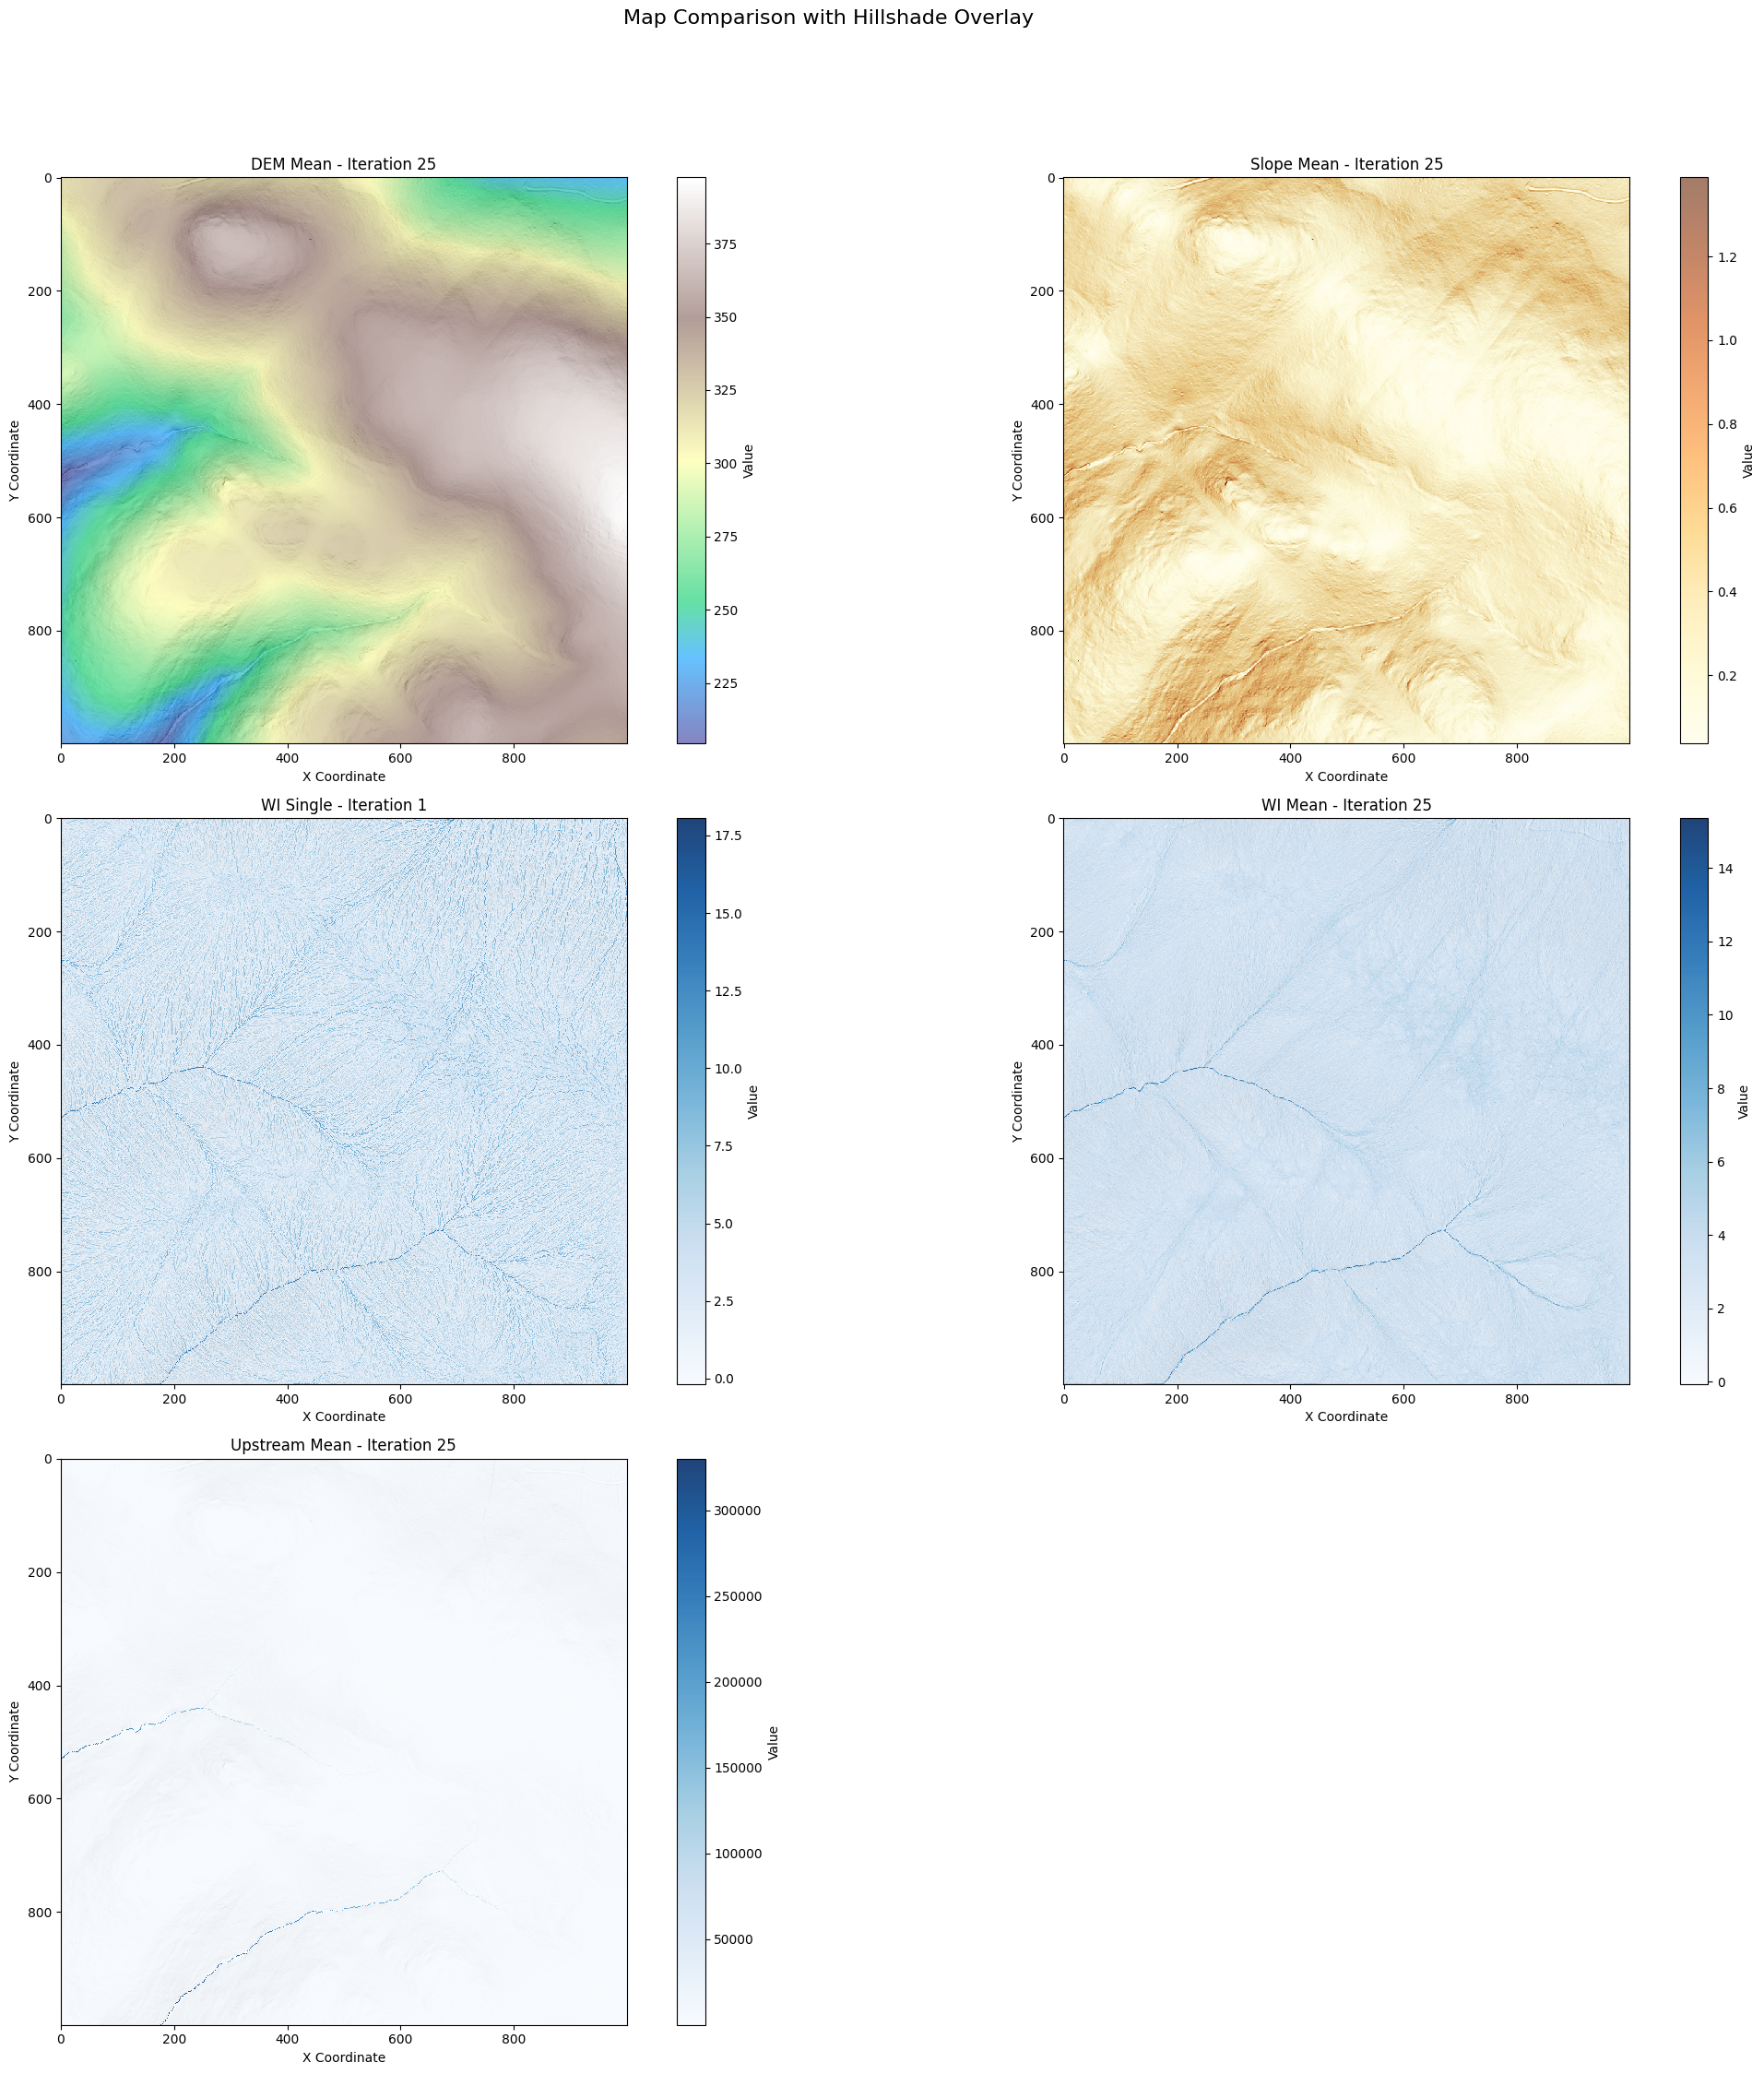

In [13]:
# Set clone map for spatial context
pcraster.setclone("dem_clone.map")

# File naming
DEMmean = f"{file_name}_DEM_Avg_{lastTimeStep}.map"
Slopemean = f"{file_name}_Slope_Avg_{lastTimeStep}.map"
WIsingle = f"{file_name}_WI_Avg_{firstTimestep}.map"
WImean = f"{file_name}_WI_Avg_{lastTimeStep}.map"
Upmean = f"{file_name}_Up_Ave_{lastTimeStep}.map"

# Ordered list of map files, titles, and colormaps
map_files = [
    (DEMmean, f"DEM Mean - Iteration {lastTimeStep}", "terrain"),
    (Slopemean, f"Slope Mean - Iteration {lastTimeStep}", "YlOrBr"),
    (WIsingle, f"WI Single - Iteration {firstTimestep}", "Blues"),
    (WImean, f"WI Mean - Iteration {lastTimeStep}", "Blues"),
    (Upmean, f"Upstream Mean - Iteration {lastTimeStep}", "Blues")
]

# Define alpha values for each map layer
alpha_values = [0.6, 0.6, 0.9, 0.9, 0.9]

# Helper function to read PCRaster map into NumPy array
def read_map_to_array(map_file):
    data = pcraster.readmap(map_file)
    return pcraster.pcr2numpy(data, np.nan)

# Create multi-directional hillshade from DEMmean
dem_array = read_map_to_array(DEMmean)

# Define multiple azimuth angles (N, NE, E, SE, S, SW, W, NW)
azimuths = [0, 45, 90, 135, 180, 225, 270, 315]
hillshades = []

for az in azimuths:
    ls = LightSource(azdeg=az, altdeg=45)
    hs = ls.hillshade(dem_array, vert_exag=1, dx=1, dy=1)
    hillshades.append(hs)

# Average the hillshades to create a composite
hillshade = np.mean(hillshades, axis=0)

# Create subplots dynamically
n_maps = len(map_files)
n_cols = 2
n_rows = int(np.ceil(n_maps / n_cols))

fig = plt.figure(figsize=(22, 22))

for i, ((map_file, title, cmap), alpha) in enumerate(zip(map_files, alpha_values)):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    array_data = read_map_to_array(map_file)

    # Apply hillshade to all maps
    ax.imshow(hillshade, cmap='gray', interpolation='nearest')
    im = ax.imshow(array_data, cmap=cmap, alpha=alpha, interpolation='nearest')

    ax.set_title(title)
    fig.colorbar(im, ax=ax, orientation='vertical', label='Value')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

# Final layout
fig.suptitle("Map Comparison with Hillshade Overlay", fontsize=16, y=1.02)  # Adds buffer above subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Prevents tight_layout from overlapping with suptitle
plt.show()

# Optional: Save figure
fig.savefig("map_comparison.png", dpi=300)


# 5. 📽️ Youtube

You may watch the animation created for this work on YouTube:  
[Watch the video on YouTube](https://youtu.be/_RYDqzrgVhI?si=PbqCJwz0VjtVcU_k)
